# STROKE PREDICTION CLASSIFICATION REPORT

## MAIN OBJECTIVE: The objective of the project is to find a classification algorithm capable of predicting stroke risk in adults, analysing demographic and health status variables


Import necesary libraries. We will take a look at risk factors for stroke in adults. The dataset included a significant proportion of children, who were excluded from the analysis since the objective is focused on adults.

Missing data was found mainly in the BMI column, and since this is a significant risk factor according to medical literature, those observations were also excluded from the analysis.
The final dataset for analysis was composed of 4073 observations, with the stroke outcome found in 208 observations.

Most data was categorical, with the exceptions of age, BMI and glucose levels.
Categorical data was then processed by One Hot Encoding to ensure better interpretation by the models.

The dataset was then divided into stratified test and train splits, and then using sklearn StandardScaler fitted to the training set, the numerical variables were standardized.
Since the classes are unbalanced, SMOTE upscaling was applied to the training sets.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1757


In [ ]:
df.work_type.value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
df.Residence_type.value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [ ]:
df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
df.groupby(['work_type'])['bmi'].mean()

,bmi
work_type,
Govt_job,30.522063
Never_worked,25.545455
Private,30.304625
Self-employed,30.211871
children,20.038003


In [ ]:
df.groupby(['work_type'])['smoking_status'].value_counts()

work_type      smoking_status 
Govt_job       never smoked        282
               formerly smoked     133
               Unknown             122
               smokes              120
Never_worked   never smoked         14
               Unknown               8
Private        never smoked       1211
               Unknown             640
               smokes              543
               formerly smoked     531
Self-employed  never smoked        331
               formerly smoked     208
               Unknown             156
               smokes              124
children       Unknown             618
               never smoked         54
               formerly smoked      13
               smokes                2
Name: count, dtype: int64

The database has 3 initial problems:
There are a significant numer of children, there are several missing bmi data, and a lesser problem, some unknown smoking status. We first remove those labeled as children

In [ ]:
df = df.drop(df[df.work_type == 'children'].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4423 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4423 non-null   object 
 1   age                4423 non-null   float64
 2   hypertension       4423 non-null   int64  
 3   heart_disease      4423 non-null   int64  
 4   ever_married       4423 non-null   object 
 5   work_type          4423 non-null   object 
 6   Residence_type     4423 non-null   object 
 7   avg_glucose_level  4423 non-null   float64
 8   bmi                4238 non-null   float64
 9   smoking_status     4423 non-null   object 
 10  stroke             4423 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 414.7+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4423.000000,4423.000000,4423.000000,4423.000000,4238.000000,4423.000000
mean,48.878137,0.112593,0.062175,107.972336,30.295281,0.055844
std,18.707171,0.316131,0.241500,47.266881,7.335574,0.229647
min,7.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,34.000000,0.000000,0.000000,77.445000,25.200000,0.000000
50%,49.000000,0.000000,0.000000,92.150000,29.100000,0.000000
75%,63.000000,0.000000,0.000000,115.885000,34.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Then we drop those effectively with age under 18


In [ ]:
df = df.drop(df[df.age < 18].index)


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4254.000000,4254.000000,4254.000000,4254.000000,4073.000000,4254.000000
mean,50.202163,0.116831,0.064645,108.514394,30.432752,0.058063
std,17.829035,0.321257,0.245927,47.769400,7.235143,0.233890
min,18.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,36.000000,0.000000,0.000000,77.482500,25.400000,0.000000
50%,50.500000,0.000000,0.000000,92.465000,29.200000,0.000000
75%,64.000000,0.000000,0.000000,116.135000,34.200000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4254 non-null   object 
 1   age                4254 non-null   float64
 2   hypertension       4254 non-null   int64  
 3   heart_disease      4254 non-null   int64  
 4   ever_married       4254 non-null   object 
 5   work_type          4254 non-null   object 
 6   Residence_type     4254 non-null   object 
 7   avg_glucose_level  4254 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking_status     4254 non-null   object 
 10  stroke             4254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 398.8+ KB


Lastly we drop nulls in bmi

In [ ]:
df = df.dropna(subset = 'bmi')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart_disease      4073 non-null   int64  
 4   ever_married       4073 non-null   object 
 5   work_type          4073 non-null   object 
 6   Residence_type     4073 non-null   object 
 7   avg_glucose_level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking_status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In [ ]:
encoded_df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], dtype = int)
encoded_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4073 non-null   float64
 1   hypertension                    4073 non-null   int64  
 2   heart_disease                   4073 non-null   int64  
 3   avg_glucose_level               4073 non-null   float64
 4   bmi                             4073 non-null   float64
 5   stroke                          4073 non-null   int64  
 6   gender_Female                   4073 non-null   int64  
 7   gender_Male                     4073 non-null   int64  
 8   gender_Other                    4073 non-null   int64  
 9   ever_married_No                 4073 non-null   int64  
 10  ever_married_Yes                4073 non-null   int64  
 11  work_type_Govt_job              4073 non-null   int64  
 12  work_type_Never_worked          4073 no

In [ ]:
encoded_df.stroke.value_counts()

,count
stroke,
0,3865
1,208


In [ ]:
encoded_df.gender_Other.value_counts()

,count
gender_Other,
0,4072
1,1


In [ ]:
del encoded_df['gender_Other']

(array([373., 327., 439., 416., 428., 575., 440., 380., 264., 431.]),
 array([18. , 24.4, 30.8, 37.2, 43.6, 50. , 56.4, 62.8, 69.2, 75.6, 82. ]),
 <BarContainer object of 10 artists>)

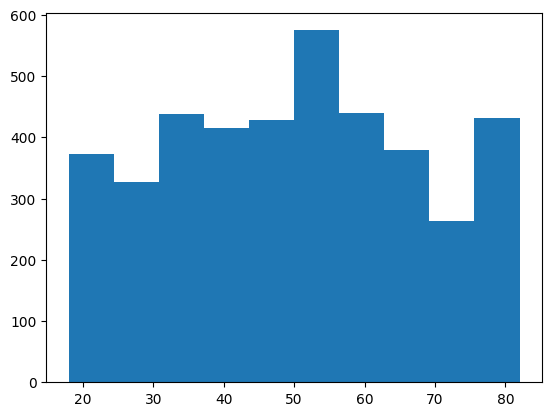

In [ ]:
plt.hist(encoded_df.age)

(array([ 995., 1408.,  744.,  232.,  126.,   75.,  182.,  190.,   98.,
          23.]),
 array([ 55.12 ,  76.782,  98.444, 120.106, 141.768, 163.43 , 185.092,
        206.754, 228.416, 250.078, 271.74 ]),
 <BarContainer object of 10 artists>)

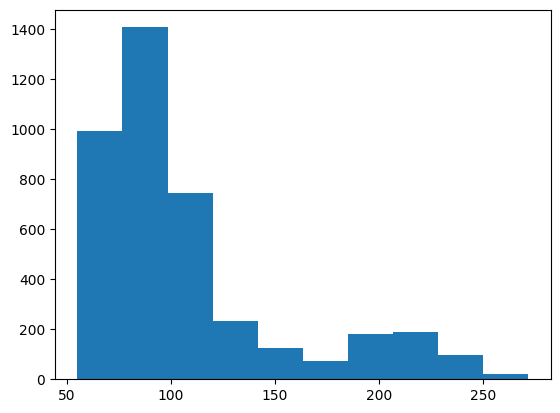

In [ ]:
plt.hist(encoded_df.avg_glucose_level)

(array([6.300e+01, 1.479e+03, 1.707e+03, 6.100e+02, 1.530e+02, 4.900e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([11.3 , 19.37, 27.44, 35.51, 43.58, 51.65, 59.72, 67.79, 75.86,
        83.93, 92.  ]),
 <BarContainer object of 10 artists>)

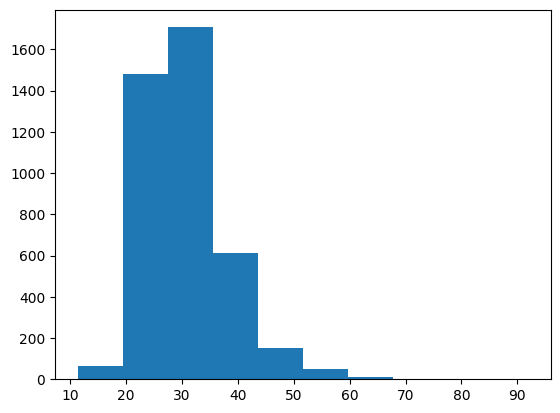

In [ ]:
plt.hist(encoded_df.bmi)

In [ ]:
y = encoded_df.stroke
X = encoded_df.drop(['stroke'], axis = 1)

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
from sklearn.compose import ColumnTransformer
encoder = StandardScaler()
CT= ColumnTransformer([('encoder', encoder, ['age', 'avg_glucose_level', 'bmi'])], remainder = 'passthrough')
X_train = CT.fit_transform(X_train)
X_test = CT.transform(X_test)

## MODEL TRAINING
Three classification models, K nearest neighbors, Logistic Regression and XGBoost, using the previously described test and train stratified splits.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN_pred = KNN.predict(X_test)

In [ ]:
print(classification_report(y_test, KNN_pred))
print('Accuracy score: ', round(accuracy_score(y_test, KNN_pred), 2))
print('F1 Score: ', round(f1_score(y_test, KNN_pred), 2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3092
           1       0.06      0.01      0.02       166

    accuracy                           0.94      3258
   macro avg       0.50      0.50      0.49      3258
weighted avg       0.90      0.94      0.92      3258

Accuracy score:  0.94
F1 Score:  0.02


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 20)}
knn2 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn2, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
best_k = knn_cv.best_params_
print(best_k)

{'n_neighbors': 6}


In [ ]:
knn8 = KNeighborsClassifier(n_neighbors = 8)
knn8.fit(X_train, y_train)
knn8pred = knn8.predict(X_test)


In [ ]:
print(classification_report(y_test, knn8pred))
print('Accuracy score: ', round(accuracy_score(y_test, knn8pred), 2))
print('F1 Score: ', round(f1_score(y_test, knn8pred), 2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3092
           1       0.00      0.00      0.00       166

    accuracy                           0.95      3258
   macro avg       0.47      0.50      0.49      3258
weighted avg       0.90      0.95      0.92      3258

Accuracy score:  0.95
F1 Score:  0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
l2_model = (LogisticRegression(penalty = 'l2', solver = 'lbfgs', multi_class = 'multinomial'))
l2_model.fit(X_train, y_train)
l2_pred = l2_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(classification_report(y_test, l2_pred))
print('Accuracy score: ', round(accuracy_score(y_test, l2_pred), 2))
print('F1 Score: ', round(f1_score(y_test, l2_pred), 2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3092
           1       0.00      0.00      0.00       166

    accuracy                           0.95      3258
   macro avg       0.47      0.50      0.49      3258
weighted avg       0.90      0.95      0.92      3258

Accuracy score:  0.95
F1 Score:  0.0


In [ ]:
lr_sagamodel = LogisticRegression(class_weight='balanced', solver='saga',penalty='elasticnet',l1_ratio=0.5,max_iter=1000)
lr_sagamodel.fit(X_train, y_train)
lr_sagapred = lr_sagamodel.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_sagapred))
print('Accuracy score: ', round(accuracy_score(y_test, lr_sagapred), 2))
print('F1 Score: ', round(f1_score(y_test, lr_sagapred), 2))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      3092
           1       0.12      0.74      0.21       166

    accuracy                           0.72      3258
   macro avg       0.55      0.73      0.52      3258
weighted avg       0.94      0.72      0.80      3258

Accuracy score:  0.72
F1 Score:  0.21


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
knn8smote = KNeighborsClassifier(n_neighbors = 8)
knn8smote.fit(X_train_balanced, y_train_balanced)
knn8smotepred = knn8.predict(X_test)

In [ ]:
print(classification_report(y_test, knn8smotepred))
print('Accuracy score: ', round(accuracy_score(y_test, knn8smotepred), 2))
print('F1 Score: ', round(f1_score(y_test, knn8smotepred), 2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3092
           1       0.00      0.00      0.00       166

    accuracy                           0.95      3258
   macro avg       0.47      0.50      0.49      3258
weighted avg       0.90      0.95      0.92      3258

Accuracy score:  0.95
F1 Score:  0.0


In [ ]:
lr_sagamodelsmote = LogisticRegression(class_weight='balanced', solver='saga',penalty='elasticnet',l1_ratio=0.5,max_iter=1000)
lr_sagamodelsmote.fit(X_train_balanced, y_train_balanced)
lr_sagapredsmote = lr_sagamodel.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_sagapredsmote))
print('Accuracy score: ', round(accuracy_score(y_test, lr_sagapredsmote), 2))
print('F1 Score: ', round(f1_score(y_test, lr_sagapredsmote), 2))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      3092
           1       0.12      0.74      0.21       166

    accuracy                           0.72      3258
   macro avg       0.55      0.73      0.52      3258
weighted avg       0.94      0.72      0.80      3258

Accuracy score:  0.72
F1 Score:  0.21


In [ ]:
from xgboost import XGBClassifier
xgmodel =XGBClassifier(objective='binary:logistic',learning_rate=0.1 ,n_estimators=5,eval_metric='mlogloss')
xgmodel.fit(X_train_balanced, y_train_balanced)
xgpred = xgmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, xgpred))
print('Accuracy score: ', round(accuracy_score(y_test, xgpred), 2))
print('F1 Score: ', round(f1_score(y_test, xgpred), 2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3092
           1       0.13      0.18      0.15       166

    accuracy                           0.90      3258
   macro avg       0.54      0.56      0.55      3258
weighted avg       0.91      0.90      0.90      3258

Accuracy score:  0.9
F1 Score:  0.15


In [ ]:
param_grid = {'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1],'n_estimators': [100, 200],'min_child_weight': [1, 3],'gamma': [0, 0.1],'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0], 'scale_pos_weight': [1, sum(y_train_balanced==0)/sum(y_train_balanced==1)]}
xgmodel2 = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xg_cv = GridSearchCV(xgmodel2, param_grid, cv = 5, scoring= 'f1', n_jobs=1,)
xg_cv.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'scale_pos_weight': [1, 1.0],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [ ]:
print("Mejores parámetros encontrados:")
print(xg_cv.best_params_)
print("\nMejor puntuación:", xg_cv.best_score_)

Mejores parámetros encontrados:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}

Mejor puntuación: 0.9650670234111743


In [ ]:
best_model = xg_cv.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))
print('Accuracy score: ', round(accuracy_score(y_test, predictions), 2))
print('F1 Score: ', round(f1_score(y_test, predictions), 2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3092
           1       0.05      0.02      0.03       166

    accuracy                           0.93      3258
   macro avg       0.50      0.50      0.50      3258
weighted avg       0.90      0.93      0.92      3258

Accuracy score:  0.93
F1 Score:  0.03


RESULTS
After training several models we found they had good accuracy scores, but since our dataset has unbalanced classes, a better estimator is the F1 score. Based on this score, the best model would be the LR with elasticnet penalty. Also, since the consequences of misclassifying a high risk patient would be inacceptable, we favor a model with a higher recall for stroke risk, confirming the choice of the LR model.
